In [1]:
#pip install kaggle


In [2]:
#Downloading dataset using kaggle API

def extract_file(file_name,file_path):
    !kaggle competitions download fake-news -f $file_name -p $file_path --force

#import os
#train_file = "train.csv"(File name should be same as given in Kaggle competition)
#test_file = "test.csv"  (File name should be same as given in Kaggle competition)
#file_path = os.path.join("<file_path>","<file_name>")
#extract_file(train_file,file_path)
#extract_file(test_file,file_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train_data = pd.read_csv("D:/FakeNews/FakeNews/train.csv")
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
train_data.shape

(20800, 5)

In [6]:
x_train = train_data.drop('label',axis=1)
y_train = train_data['label']

In [7]:
x_train.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [8]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
train_data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
train_data = train_data.dropna()

In [11]:
train_data.shape

(18285, 5)

In [12]:
train_data.reset_index(inplace = True)

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0,len(train_data)):
    news = re.sub('[^a-zA-Z]',' ',train_data['text'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
    news = " ".join(news)
    corpus.append(news)

In [16]:
word_corpus = pd.to_pickle(corpus,"D:/FakeNews/FakeNews/corpus.pkl")

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range = range(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [21]:
y = train_data['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)

In [24]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': range(1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [25]:
tfidf.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [27]:
count_df = pd.DataFrame(X_train,columns = tfidf.get_feature_names())
count_df

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young man,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
import itertools
def plot_cm(cm,classes,normalize = False,title="Confusion Matrix",cmap = plt.cm.Greens):
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plot_ticks = np.arange(len(classes))
    plt.xticks(plot_ticks,classes)
    plt.yticks(plot_ticks,classes)
    threshold = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment = 'center',color = "white" if cm[i,j]>threshold else "black")
    plt.tight_layout()
    plt.xlabel("True Value")
    plt.ylabel("Predicted Value")

## Naive Bayes 

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

Accuracy:0.899


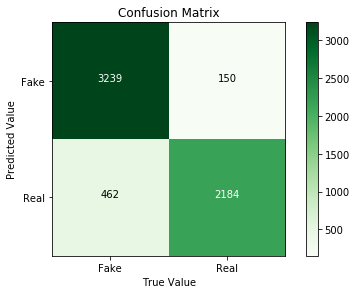

In [41]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
predict = nb.predict(X_test)
acc = metrics.accuracy_score(y_test,predict)
cm = metrics.confusion_matrix(y_test,predict)
print("Accuracy:%0.3f"%acc)
plot_cm(cm,classes=['Fake','Real'])


## Multinomial NB with hyper-parameter

In [62]:
nb = MultinomialNB(alpha =0.0)
prev_score = 0
xalpha = []
yacc = []
for alpha in np.arange(0,1,0.1):
    nb_ = MultinomialNB(alpha = alpha)
    nb_.fit(X_train,y_train)
    predict_= nb_.predict(X_test)
    acc_ = metrics.accuracy_score(y_test,predict_)
    if acc_>prev_score:
        nb = nb_
    xalpha.append(alpha)
    yacc.append(acc_)
    print("Alpha:{}, Accuracy:{}".format(alpha,acc_))
    

C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha:0.0, Accuracy:0.9017398508699255
Alpha:0.1, Accuracy:0.9012427506213753
Alpha:0.2, Accuracy:0.9015741507870754
Alpha:0.30000000000000004, Accuracy:0.9015741507870754
Alpha:0.4, Accuracy:0.9010770505385253
Alpha:0.5, Accuracy:0.9007456503728252
Alpha:0.6000000000000001, Accuracy:0.9005799502899752
Alpha:0.7000000000000001, Accuracy:0.9004142502071251
Alpha:0.8, Accuracy:0.8995857497928749
Alpha:0.9, Accuracy:0.8992543496271748


Text(0, 0.5, 'Accuracy Score')

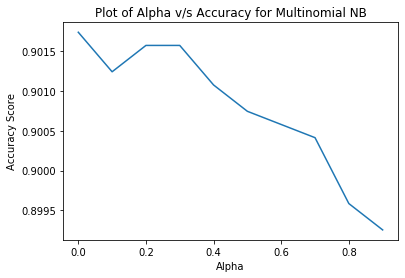

In [63]:
plt.plot(xalpha,yacc)
plt.title("Plot of Alpha v/s Accuracy for Multinomial NB")
plt.xlabel("Alpha")
plt.ylabel("Accuracy Score")

In [64]:
NB_tfidf = pd.to_pickle(nb,"D:/FakeNews/FakeNews/NB_tfidf.pkl")

#### From the above result we can conclude that alpha = 0 is suitable hyperparameter value

# Count Vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,ngram_range = range(1,3))
X = cv.fit_transform(corpus).toarray()

In [55]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': range(1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [57]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [52]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X,y,test_size=0.3,random_state=0)

Accuracy:0.896


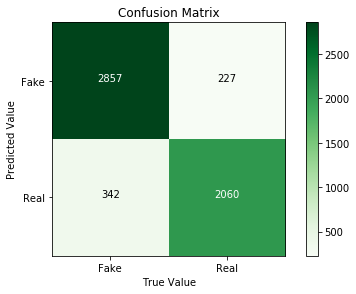

In [54]:
nb = MultinomialNB()
nb.fit(X_train_cv,y_train_cv)
predict = nb.predict(X_test_cv)
acc = metrics.accuracy_score(y_test_cv,predict)
cm_cv = metrics.confusion_matrix(y_test_cv,predict)
print("Accuracy:%0.3f"%acc)
plot_cm(cm_cv,classes=['Fake','Real'])

In [65]:
nb = MultinomialNB(alpha =0.0)
prev_score = 0
xalpha = []
yacc = []
for alpha in np.arange(0,1,0.1):
    nb_ = MultinomialNB(alpha = alpha)
    nb_.fit(X_train_cv,y_train_cv)
    predict_= nb_.predict(X_test_cv)
    acc_ = metrics.accuracy_score(y_test_cv,predict_)
    if acc_>prev_score:
        nb = nb_
    xalpha.append(alpha)
    yacc.append(acc_)
    print("Alpha:{}, Accuracy:{}".format(alpha,acc_))
    

C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha:0.0, Accuracy:0.8971928545388261
Alpha:0.1, Accuracy:0.8966460080204156
Alpha:0.2, Accuracy:0.8966460080204156
Alpha:0.30000000000000004, Accuracy:0.8964637258476121
Alpha:0.4, Accuracy:0.8966460080204156
Alpha:0.5, Accuracy:0.8964637258476121
Alpha:0.6000000000000001, Accuracy:0.8964637258476121
Alpha:0.7000000000000001, Accuracy:0.8964637258476121
Alpha:0.8, Accuracy:0.8962814436748086
Alpha:0.9, Accuracy:0.8962814436748086


Text(0, 0.5, 'Accuracy Score')

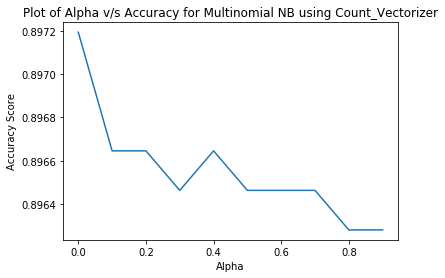

In [66]:
plt.plot(xalpha,yacc)
plt.title("Plot of Alpha v/s Accuracy for Multinomial NB using Count_Vectorizer")
plt.xlabel("Alpha")
plt.ylabel("Accuracy Score")

In [67]:
NB_cv = pd.to_pickle(nb,"D:/FakeNews/FakeNews/NB_cv.pkl")